Conclusions: 
Capomulin and Ramicane have a good percentage of of survival
The previous comments is reinforced with the total volume of the tumor and its reduction.
Finally they both had have the lowestnegative impact in terms of metastasis

In [80]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
# Take in all of our wrestling data and read it into pandas
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data_set_df = pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on='Mouse ID')
combined_data_set_df = combined_data_set_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]
combined_data_set_df.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [67]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
main_tumor_by_drug_time2 =pd.DataFrame({'count' : combined_data_set_df.groupby( ['Drug','Timepoint'] )['Tumor Volume (mm3)'].mean()}).reset_index()
# Preview DataFrame

main_tumor_by_drug_time2

,Drug,Timepoint,count
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [68]:
mein_tumor_pivote = pd.pivot_table(main_tumor_by_drug_time2, index='Timepoint', columns='Drug', values='count', aggfunc = np.mean)
mein_tumor_pivote


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


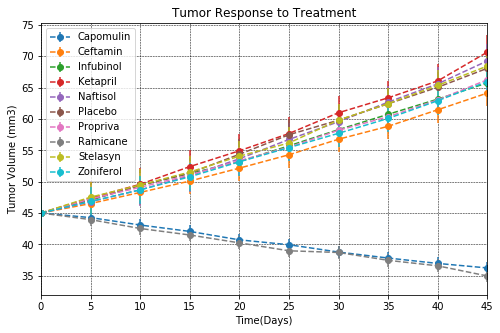

In [69]:
# Generate the Plot (with Error Bars)
time_x_axis = mein_tumor_pivote.index
plt.figure(figsize=(8,5))
plt.errorbar(time_x_axis, mein_tumor_pivote['Capomulin'],yerr=mein_tumor_pivote['Capomulin'].sem(), marker ='o', linestyle='--', label="Capomulin")
plt.errorbar(time_x_axis, mein_tumor_pivote['Ceftamin'],yerr=mein_tumor_pivote['Ceftamin'].sem(), marker ='o', linestyle='--', label="Ceftamin")
plt.errorbar(time_x_axis, mein_tumor_pivote['Infubinol'],yerr=mein_tumor_pivote['Infubinol'].sem(), marker ='o', linestyle='--', label="Infubinol")
plt.errorbar(time_x_axis, mein_tumor_pivote['Ketapril'],yerr=mein_tumor_pivote['Ketapril'].sem(), marker ='o', linestyle='--', label="Ketapril")
plt.errorbar(time_x_axis, mein_tumor_pivote['Naftisol'],yerr=mein_tumor_pivote['Naftisol'].sem(), marker ='o', linestyle='--', label="Naftisol")
plt.errorbar(time_x_axis, mein_tumor_pivote['Placebo'],yerr=mein_tumor_pivote['Placebo'].sem(), marker ='o', linestyle='--', label="Placebo")
plt.errorbar(time_x_axis, mein_tumor_pivote['Propriva'],yerr=mein_tumor_pivote['Propriva'].sem(), marker ='o', linestyle='--', label="Propriva")
plt.errorbar(time_x_axis, mein_tumor_pivote['Ramicane'],yerr=mein_tumor_pivote['Ramicane'].sem(), marker ='o', linestyle='--', label="Ramicane")
plt.errorbar(time_x_axis, mein_tumor_pivote['Stelasyn'],yerr=mein_tumor_pivote['Stelasyn'].sem(), marker ='o', linestyle='--', label="Stelasyn")
plt.errorbar(time_x_axis, mein_tumor_pivote['Zoniferol'],yerr=mein_tumor_pivote['Zoniferol'].sem(), marker ='o', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time(Days)', ylabel = 'Tumor Volume (mm3)',title = 'Tumor Response to Treatment',xlim = (0,max(Timepoint)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

# Save the Figure



## Metastatic Response to Treatment

In [70]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
main_tumor_by_drug_time4=pd.DataFrame({'count' : combined_data_set_df.groupby( ['Drug','Timepoint'] )['Metastatic Sites'].mean()}).reset_index()
# Convert to DataFrame
main_tumor_by_drug_time4
# Preview DataFrame


,Drug,Timepoint,count
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [71]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
main_tumor_by_drug_time5=pd.DataFrame({'count' : combined_data_set_df.groupby( ['Drug','Timepoint'] )['Metastatic Sites'].sem()}).reset_index()
# Convert to DataFrame
main_tumor_by_drug_time5.head()
# Preview DataFrame


,Drug,Timepoint,count
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [72]:
# Minor Data Munging to Re-Format the Data Frames
mein_tumor_pivote.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


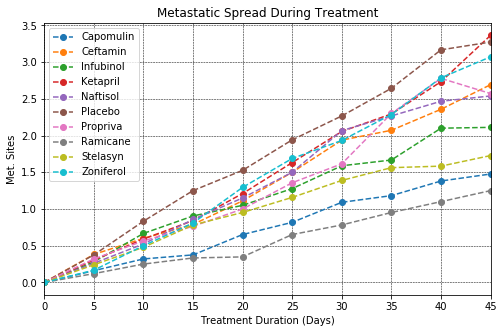

In [73]:
# Generate the Plot (with Error Bars)
metastatic_tumor_pivote = pd.pivot_table(main_tumor_by_drug_time4, index='Timepoint', columns='Drug', values='count', aggfunc = np.mean)
metastatic_x_values = metastatic_tumor_pivote.index
plt.figure(figsize=(8,5))

plt.plot(metastatic_x_values, metastatic_tumor_pivote['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Ceftamin'], marker ='o', linestyle='--', label="Ceftamin")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Infubinol'], marker ='o', linestyle='--', label="Infubinol")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Ketapril'], marker ='o', linestyle='--', label="Ketapril")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Naftisol'], marker ='o', linestyle='--', label="Naftisol")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Placebo'], marker ='o', linestyle='--', label="Placebo")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Propriva'], marker ='o', linestyle='--', label="Propriva")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Ramicane'], marker ='o', linestyle='--', label="Ramicane")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Stelasyn'], marker ='o', linestyle='--', label="Stelasyn")
plt.plot(metastatic_x_values, metastatic_tumor_pivote['Zoniferol'], marker ='o', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Treatment Duration (Days)', ylabel = 'Met. Sites',title = 'Metastatic Spread During Treatment',xlim = (0,max(metastatic_x_values)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()
# Save the Figure

# Show the Figure



## Survival Rates

In [74]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates=pd.DataFrame({'count' : combined_data_set_df.groupby( ['Drug','Timepoint'] )['Mouse ID'].count()}).reset_index()
# Convert to DataFrame
survival_rates.head()
# Preview DataFrame


,Drug,Timepoint,count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [75]:
# Minor Data Munging to Re-Format the Data Frames
survival_rates_pivote = pd.pivot_table(survival_rates, index='Timepoint', columns='Drug', values='count', aggfunc = np.mean)
survival_rates_pivote
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [76]:
# Generate the Plot (Accounting for percentages)
survival_rate_plot = round(survival_rates_pivote.apply(lambda c: c / c.max() * 100, axis=0),2)


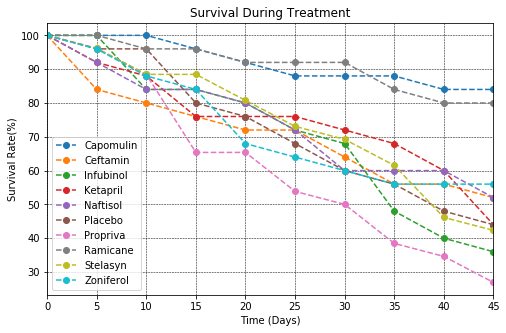

In [77]:
survival_x_values = survival_rate_plot.index
plt.figure(figsize=(8,5))

plt.plot(survival_x_values, survival_rate_plot['Capomulin'], marker ='o', linestyle='--', label="Capomulin")
plt.plot(survival_x_values, survival_rate_plot['Ceftamin'], marker ='o', linestyle='--', label="Ceftamin")
plt.plot(survival_x_values, survival_rate_plot['Infubinol'], marker ='o', linestyle='--', label="Infubinol")
plt.plot(survival_x_values, survival_rate_plot['Ketapril'], marker ='o', linestyle='--', label="Ketapril")
plt.plot(survival_x_values, survival_rate_plot['Naftisol'], marker ='o', linestyle='--', label="Naftisol")
plt.plot(survival_x_values, survival_rate_plot['Placebo'], marker ='o', linestyle='--', label="Placebo")
plt.plot(survival_x_values, survival_rate_plot['Propriva'], marker ='o', linestyle='--', label="Propriva")
plt.plot(survival_x_values, survival_rate_plot['Ramicane'], marker ='o', linestyle='--', label="Ramicane")
plt.plot(survival_x_values, survival_rate_plot['Stelasyn'], marker ='o', linestyle='--', label="Stelasyn")
plt.plot(survival_x_values, survival_rate_plot['Zoniferol'], marker ='o', linestyle='--', label="Zoniferol")
plt.gca().set(xlabel = 'Time (Days)', ylabel = 'Survival Rate(%)',title = 'Survival During Treatment',xlim = (0,max(survival_x_values)))
plt.legend(loc = 'best', frameon=True)
plt.grid()
plt.show()

## Summary Bar Graph

In [78]:
# Calculate the percent changes for each drug
drugPercentChange = (((mein_tumor_pivote.iloc[-1]-mein_tumor_pivote.iloc[0])/mein_tumor_pivote.iloc[0])*100).to_frame('Percentage')
# Display the data to confirm
drugPercentChange

,Percentage
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


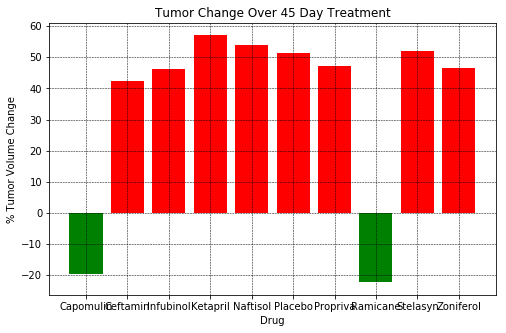

In [79]:
x=drugPercentChange.index
y=drugPercentChange['Percentage']
plt.figure(figsize=(8,5))
colors = ['red' if _y >=0 else 'green' for _y in y]
ax = plt.bar(x, y, color = colors)
plt.gca().set(xlabel='Drug', ylabel='% Tumor Volume Change', title='Tumor Change Over 45 Day Treatment')
plt.rc('grid', linestyle="--", color='black', linewidth=0.5)
plt.grid(True)
plt.show()